# **Import Modules**

In [49]:
import pandas as pd
import numpy as np
import os #to deal with files 
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
import librosa  # for audio libraries
import librosa.display
from IPython.display import Audio #for audio playing
import warnings
warnings.filterwarnings("ignore")

# **Loading the Datasets**

In [50]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Data set is loaded")

Data set is loaded


In [51]:
paths[:5]

['Data\\OAF_angry\\OAF_back_angry.wav',
 'Data\\OAF_angry\\OAF_bar_angry.wav',
 'Data\\OAF_angry\\OAF_base_angry.wav',
 'Data\\OAF_angry\\OAF_bath_angry.wav',
 'Data\\OAF_angry\\OAF_bean_angry.wav']

In [52]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

# **Creating and loading the Dataframe**

In [53]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,Data\OAF_angry\OAF_back_angry.wav,angry
1,Data\OAF_angry\OAF_bar_angry.wav,angry
2,Data\OAF_angry\OAF_base_angry.wav,angry
3,Data\OAF_angry\OAF_bath_angry.wav,angry
4,Data\OAF_angry\OAF_bean_angry.wav,angry


In [54]:
print(df.info())
df['label'].value_counts()

<bound method DataFrame.info of                                  speech  label
0     Data\OAF_angry\OAF_back_angry.wav  angry
1      Data\OAF_angry\OAF_bar_angry.wav  angry
2     Data\OAF_angry\OAF_base_angry.wav  angry
3     Data\OAF_angry\OAF_bath_angry.wav  angry
4     Data\OAF_angry\OAF_bean_angry.wav  angry
...                                 ...    ...
5595     Data\YAF_sad\YAF_witch_sad.wav    sad
5596     Data\YAF_sad\YAF_yearn_sad.wav    sad
5597       Data\YAF_sad\YAF_yes_sad.wav    sad
5598     Data\YAF_sad\YAF_young_sad.wav    sad
5599     Data\YAF_sad\YAF_youth_sad.wav    sad

[5600 rows x 2 columns]>


label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

# **Exploratory Data Analysis**

<Axes: xlabel='label', ylabel='count'>

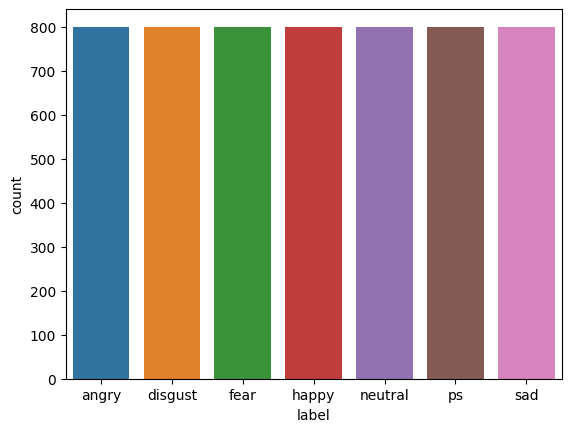

In [55]:
sns.countplot(x=df['label'])

Wave plot

In [56]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(5, 5))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    

def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(5, 5))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

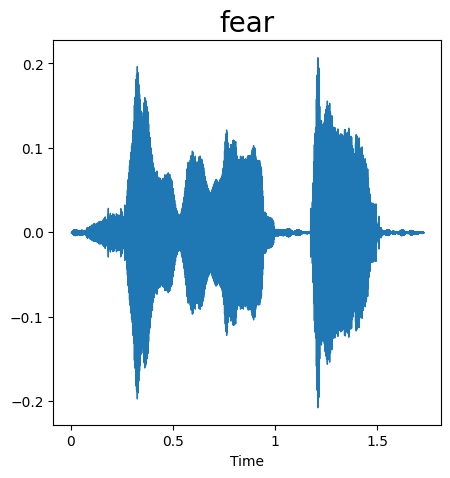

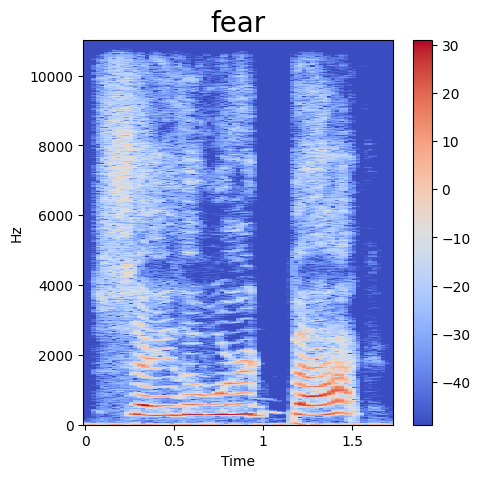

In [57]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

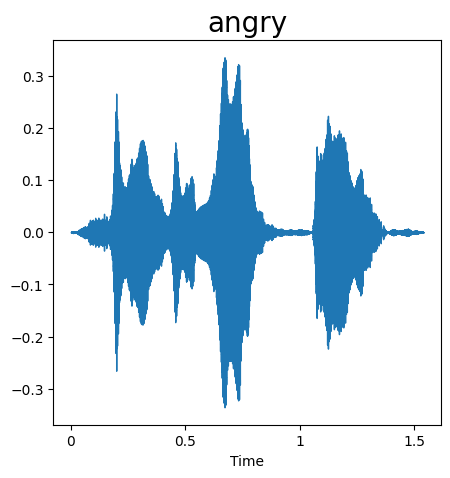

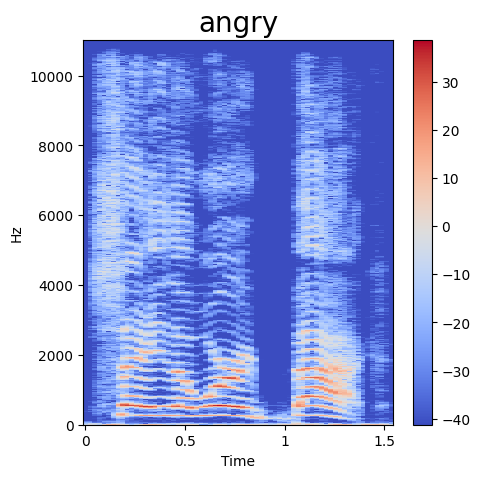

In [58]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

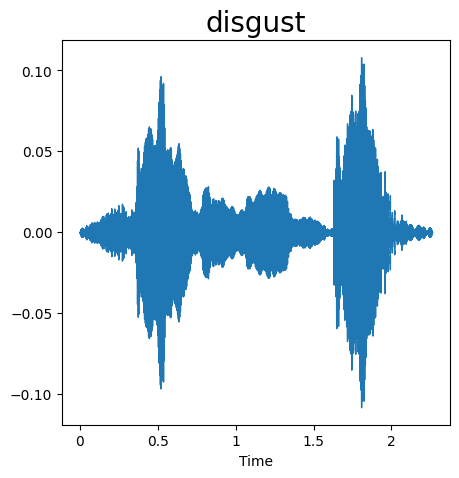

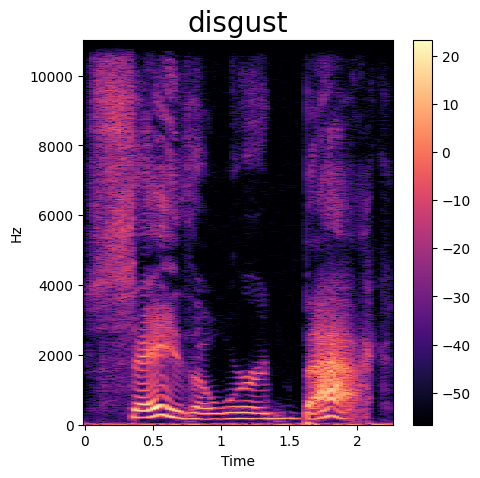

In [59]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

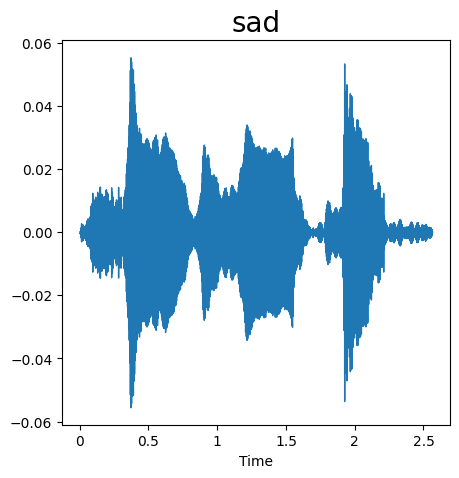

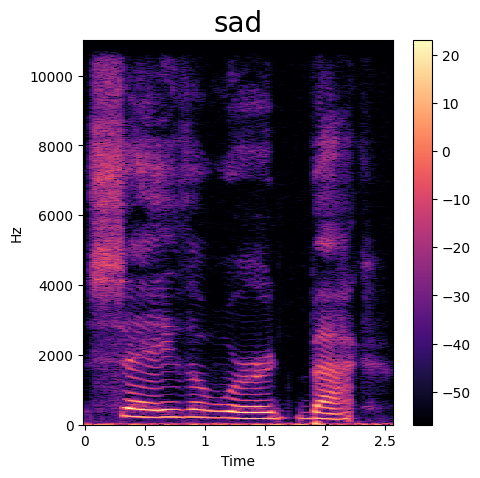

In [60]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

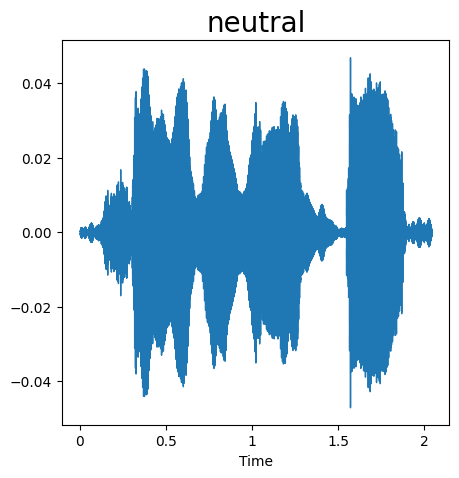

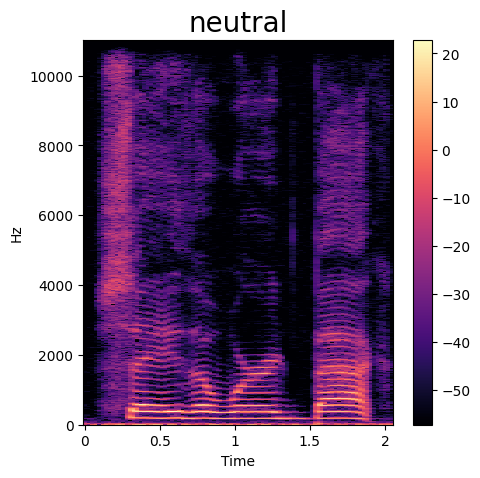

In [61]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

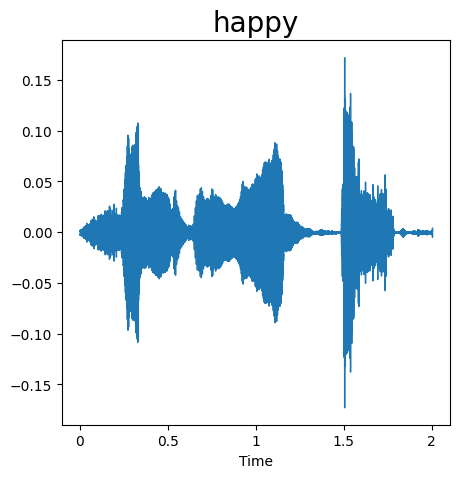

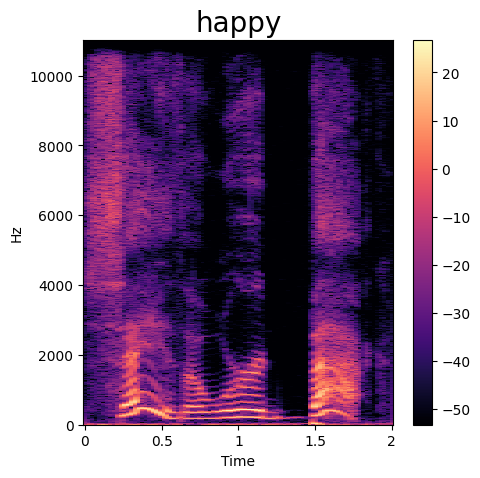

In [62]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

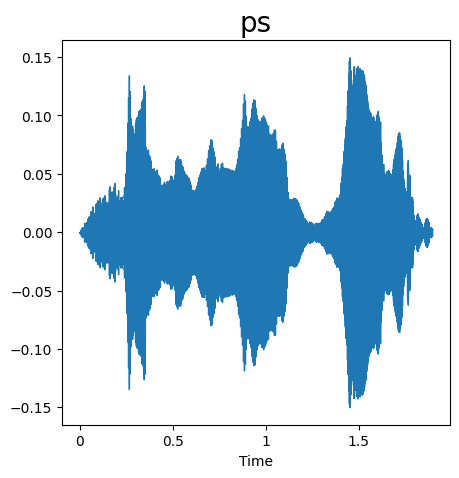

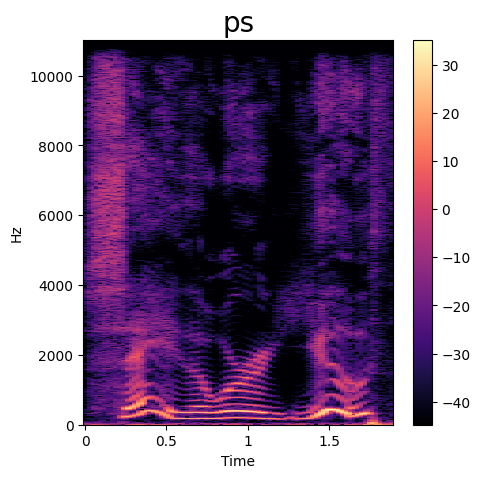

In [63]:
# Pleasant Surprise
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[199]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectogram(data,smapling_rate,emotion)
Audio(path)

# **Feature Extraction**

In [64]:
def extract_mfcc(file_name):
    y,sr = librosa.load(file_name,duration=3,offset=0.5)
    mfcc =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [65]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [66]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))

In [67]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [68]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [69]:
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [70]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y=encoder.fit_transform(df[['label']])

In [71]:
y=y.toarray()
y.shape

(5600, 7)

# **Creating the LSTM model**

In [72]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123,return_sequences=False, input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 64)                7936      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

In [73]:
# Train the model
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 5s 333ms/step - loss: 1.8369 - accuracy: 0.2583 - val_loss: 1.9436 - val_accuracy: 0.0661
Epoch 2/100
9/9 [==============================] - 2s 244ms/step - loss: 1.5779 - accuracy: 0.4069 - val_loss: 1.6972 - val_accuracy: 0.4402
Epoch 3/100
9/9 [==============================] - 3s 301ms/step - loss: 1.2654 - accuracy: 0.5536 - val_loss: 1.0860 - val_accuracy: 0.6107
Epoch 4/100
9/9 [==============================] - 2s 279ms/step - loss: 1.0107 - accuracy: 0.6058 - val_loss: 0.8476 - val_accuracy: 0.7116
Epoch 5/100
9/9 [==============================] - 2s 269ms/step - loss: 0.8070 - accuracy: 0.6975 - val_loss: 0.5776 - val_accuracy: 0.8821
Epoch 6/100
9/9 [==============================] - 2s 277ms/step - loss: 0.6298 - accuracy: 0.7940 - val_loss: 0.3730 - val_accuracy: 0.9366
Epoch 7/100
9/9 [==============================] - 2s 273ms/step - loss: 0.4551 - accuracy: 0.8589 - val_loss: 0.2202 - val_accuracy: 0.9670
Epoch 8/100
9

# **Plot the Results**

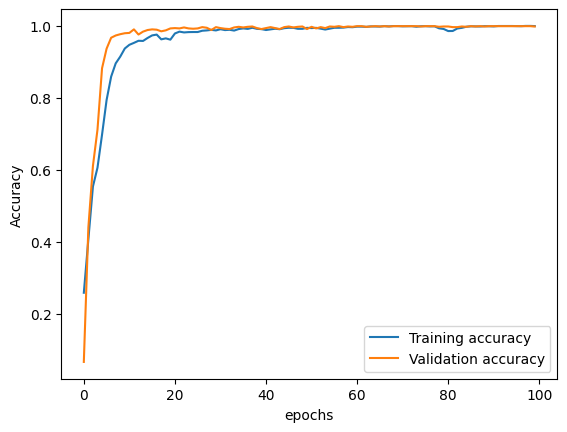

In [74]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,label="Training accuracy")
plt.plot(epochs,val_acc,label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

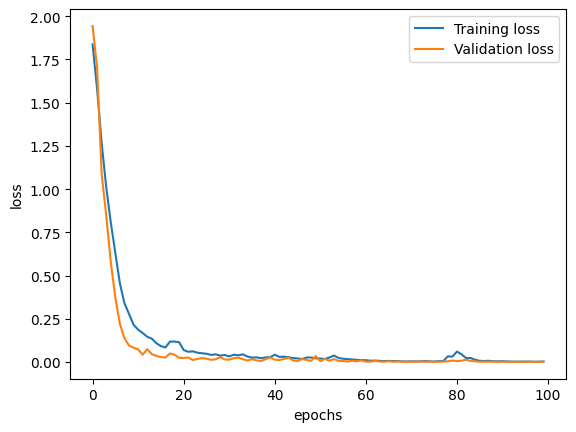

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [76]:
model.save('model.h5')